# Лабораторная работа 3 Линейная КУ

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def p(x): return 0
def q(x): return -(10 + np.sin(2 * np.pi * x))
def f(x): return np.cos(2 * np.pi * x)

h_1 = 0.001
h_2 = 0.2

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def periodicTridiagonal(pk, qk, fk, h):
    N = len(fk)

    # Коэффициенты для разностной схемы
    a = 1 - 0.5 * pk * h
    b = 2 - qk * h**2
    c = 1 + 0.5 * pk * h
    phi = fk * h**2  # Правая часть уравнений

    alpha = np.zeros(N)
    beta = np.zeros(N)
    gamma = np.zeros(N)

    # Инициализация для первого уравнения
    alpha[1] = c[0] / b[0]
    beta[1] = -phi[0] / b[0]
    gamma[1] = a[0] / b[0]

    # Прямой ход прогонки
    for k in range(1, N - 1):
        denom = b[k] - a[k] * alpha[k]
        alpha[k + 1] = c[k] / denom
        beta[k + 1] = (a[k] * beta[k] - phi[k]) / denom
        gamma[k + 1] = a[k] * gamma[k] / denom
        
    mu = np.zeros(N)
    nu = np.zeros(N)

    # Для последнего уравнения
    k = N - 1
    denom = a[k] * (alpha[k] + gamma[k]) - b[k]
    mu[k] = -c[k] / denom
    nu[k] = (phi[k] - a[k] * beta[k]) / denom

    # Обратный ход прогонки
    for k in range(N - 1, 0, -1):
        mu[k - 1] = alpha[k] * mu[k] + gamma[k] * mu[N - 1]
        nu[k - 1] = beta[k] + alpha[k] * nu[k] + gamma[k] * nu[N - 1]

    # Решение на сетке
    y = np.zeros(N)

    # Вычисление для y_0
    y[0] = nu[0] / (1 - mu[0])

    # Для последнего значения y_N
    y[N - 1] = mu[N - 1] * y[0] + nu[N - 1]

    # Заполнение значений для y
    for k in range(N - 2, 0, -1):
        y[k] = alpha[k + 1] * y[k + 1] + beta[k + 1] + gamma[k + 1] * y[N - 1]

    return y

def solvePeriodic(p, q, f, h):
    T = 1.0
    N = int(T / h + 1)
    xk = np.linspace(0, 1, N)

    pk = np.array([p(x) for x in xk])
    qk = np.array([q(x) for x in xk])
    fk = np.array([f(x) for x in xk])

    yk = periodicTridiagonal(pk, qk, fk, h)

    return xk, yk



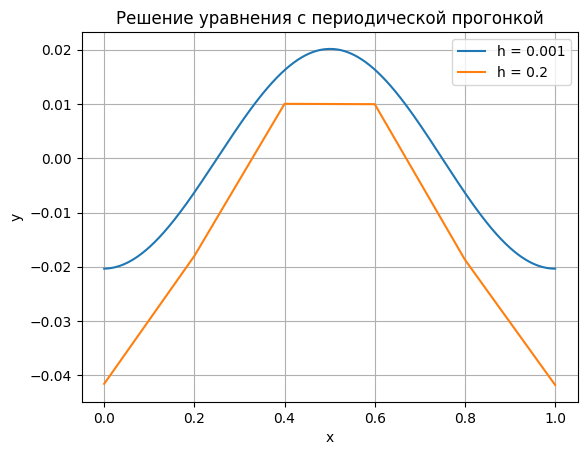

In [46]:
xk_1, yk_1 = solvePeriodic(p, q, f, h_1)
xk_2, yk_2 = solvePeriodic(p, q, f, h_2)

plt.plot(xk_1, yk_1, label='h = 0.001')
plt.plot(xk_2, yk_2, label='h = 0.2')
plt.title("Решение уравнения с периодической прогонкой")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()